In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns

In [2]:
mnist = keras.datasets.mnist

In [40]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

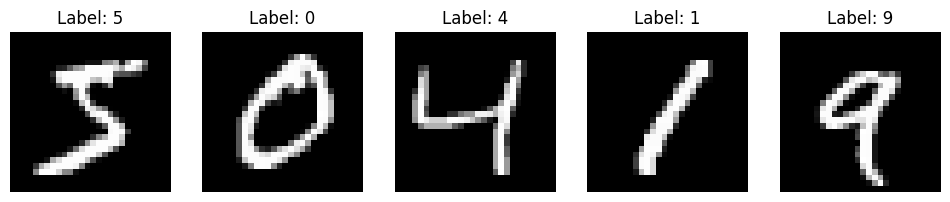

In [41]:
plt.figure(figsize=(12, 5))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
np.isnan(X_train).any()

False

In [6]:
np.isnan(X_test).any()

False

Reshaping the data from a 2D array (28x28 pixels) to a 1D array (784 pixels) 

In [7]:
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
X_test /= 255

In [8]:
# One-hot representation of the labels.
y_train = keras.utils.to_categorical(y_train, 10) 
y_test = keras.utils.to_categorical(y_test, 10)

In [9]:
model = Sequential()

In [10]:
model.add(Dense(10, input_shape=[RESHAPED], activation="softmax"))

In [11]:
model.compile(
    optimizer='SGD', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
training = model.fit(X_train, y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
750/750 [==============================] - 1s 1ms/step - loss: 1.0894 - accuracy: 0.7444 - val_loss: 0.6554 - val_accuracy: 0.8577
Epoch 2/70
750/750 [==============================] - 1s 1ms/step - loss: 0.6066 - accuracy: 0.8539 - val_loss: 0.5081 - val_accuracy: 0.8773
Epoch 3/70
750/750 [==============================] - 1s 1ms/step - loss: 0.5114 - accuracy: 0.8697 - val_loss: 0.4504 - val_accuracy: 0.8852
Epoch 4/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4654 - accuracy: 0.8788 - val_loss: 0.4179 - val_accuracy: 0.8913
Epoch 5/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4368 - accuracy: 0.8841 - val_loss: 0.3966 - val_accuracy: 0.8966
Epoch 6/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4170 - accuracy: 0.8880 - val_loss: 0.3815 - val_accuracy: 0.8994
Epoch 7/70
750/750 [==============================] - 1s 1ms/step - loss: 0.4022 - accuracy: 0.8919 - val_loss: 0.3700 - val_accuracy: 0.9020
Epoch 

In [13]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


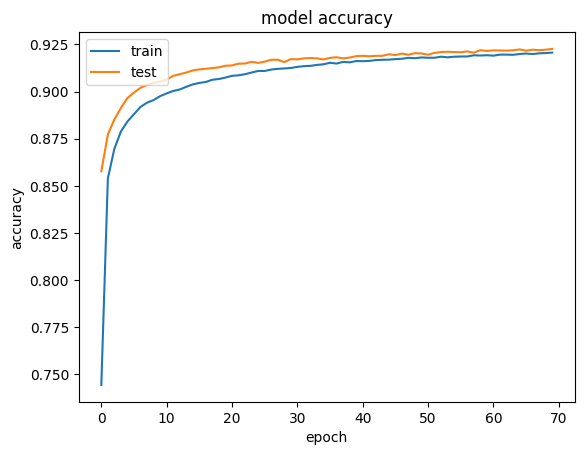

In [14]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

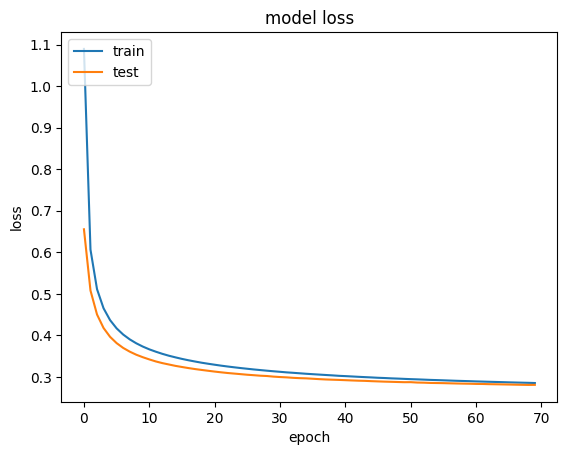

In [15]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 954us/step - loss: 0.2824 - accuracy: 0.9209
Test accuracy: 0.9208999872207642


In [17]:
model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_config': {

Improved Model 2: Adding Hidden Layer – Multi Layer Perceptron

In [18]:
model_2 = tf.keras.Sequential()
N_hidden = 64

model_2.add(Dense(N_hidden, input_shape=[784], activation = 'relu'))
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dense(10, activation = 'softmax'))

model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training2 = model_2.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0587 - accuracy: 0.7154 - val_loss: 0.4926 - val_accuracy: 0.8743
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4346 - accuracy: 0.8812 - val_loss: 0.3527 - val_accuracy: 0.9023
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3510 - accuracy: 0.8999 - val_loss: 0.3070 - val_accuracy: 0.9156
Epoch 4/100
750/750 [==============================] - 1s 1ms/step - loss: 0.3131 - accuracy: 0.9108 - val_loss: 0.2862 - val_accuracy: 0.9182
Epoch 5/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.9178 - val_loss: 0.2665 - val_accuracy: 0.9252
Epoch 6/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2699 - accuracy: 0.9231 - val_loss: 0.2510 - val_accuracy: 0.9277
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.2549 - accuracy: 0.9275 - val_loss: 0.2418 - val_accuracy: 0.9312

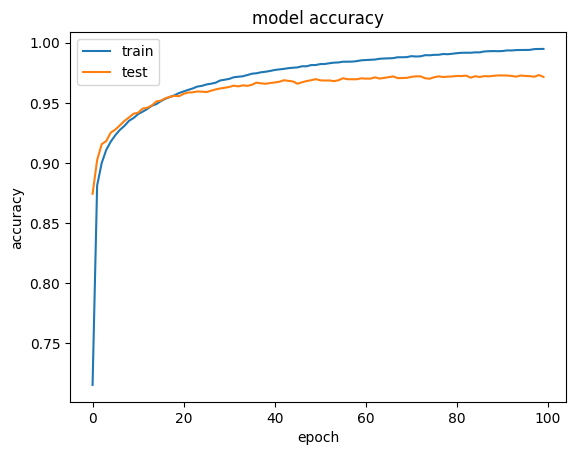

In [19]:
plt.plot(training2.history['accuracy'])
plt.plot(training2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

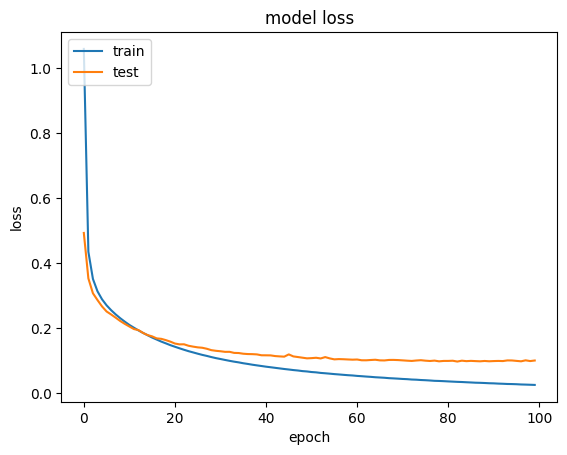

In [20]:
plt.plot(training2.history['loss'])
plt.plot(training2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
test_loss, test_acc = model_2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9736
Test accuracy: 0.9735999703407288


Improved Model 3 – Adding Dropout to Avoid Overfitting

In [23]:
model_3 = tf.keras.Sequential()
N_hidden = 128


model_3.add(Dense(N_hidden, input_shape=[784], activation = 'relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(N_hidden, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(10, activation = 'softmax'))

model_3.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training3 = model_3.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 1.3086 - accuracy: 0.5881 - val_loss: 0.5428 - val_accuracy: 0.8643
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6544 - accuracy: 0.8008 - val_loss: 0.3743 - val_accuracy: 0.8959
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.5165 - accuracy: 0.8445 - val_loss: 0.3141 - val_accuracy: 0.9118
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4472 - accuracy: 0.8685 - val_loss: 0.2796 - val_accuracy: 0.9190
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4016 - accuracy: 0.8820 - val_loss: 0.2571 - val_accuracy: 0.9249
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.3700 - accuracy: 0.8920 - val_loss: 0.2394 - val_accuracy: 0.9298
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3459 - accuracy: 0.8984 - val_loss: 0.2246 - val_accuracy: 0.9331
Epoch 

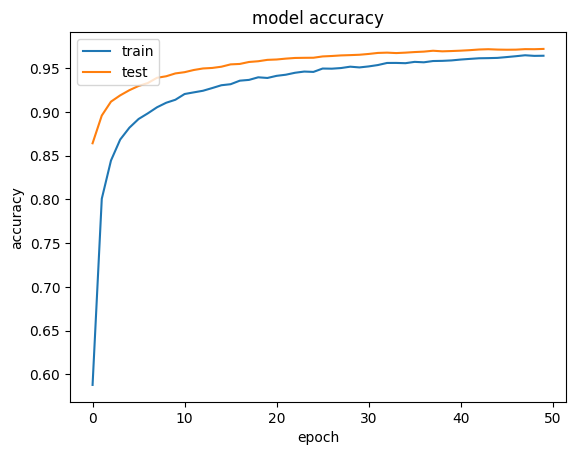

In [24]:
plt.plot(training3.history['accuracy'])
plt.plot(training3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

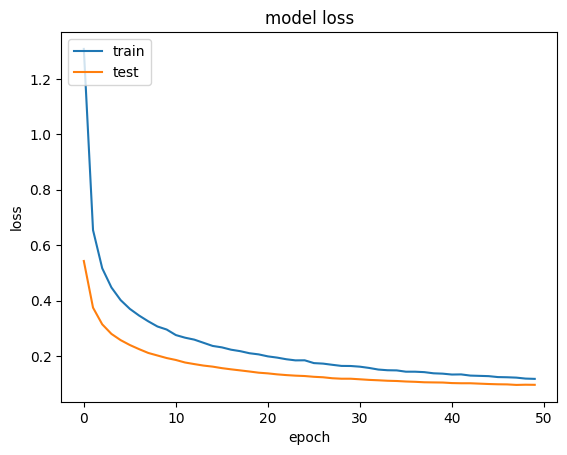

In [25]:
plt.plot(training3.history['loss'])
plt.plot(training3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
test_loss, test_acc = model_3.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9733
Test accuracy: 0.9732999801635742


Improved Model 4: Increasing the number of Hidden Layer neuron

In [28]:
model_4 = tf.keras.Sequential()
N_hidden = 512

model_4.add(Dense(N_hidden, input_shape=[784], activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(N_hidden,  activation='relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(10, activation = 'softmax'))

model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training4 = model_4.fit(X_train, y_train, batch_size=128, epochs=31, validation_split=0.2)

Epoch 1/31
375/375 [==============================] - 4s 10ms/step - loss: 0.3041 - accuracy: 0.9074 - val_loss: 0.1188 - val_accuracy: 0.9668
Epoch 2/31
375/375 [==============================] - 4s 9ms/step - loss: 0.1267 - accuracy: 0.9617 - val_loss: 0.0963 - val_accuracy: 0.9710
Epoch 3/31
375/375 [==============================] - 4s 10ms/step - loss: 0.0911 - accuracy: 0.9720 - val_loss: 0.0895 - val_accuracy: 0.9726
Epoch 4/31
375/375 [==============================] - 3s 9ms/step - loss: 0.0704 - accuracy: 0.9771 - val_loss: 0.0880 - val_accuracy: 0.9744
Epoch 5/31
375/375 [==============================] - 3s 9ms/step - loss: 0.0611 - accuracy: 0.9797 - val_loss: 0.0767 - val_accuracy: 0.9768
Epoch 6/31
375/375 [==============================] - 3s 9ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0768 - val_accuracy: 0.9776
Epoch 7/31
375/375 [==============================] - 4s 10ms/step - loss: 0.0468 - accuracy: 0.9844 - val_loss: 0.0753 - val_accuracy: 0.9793
Epo

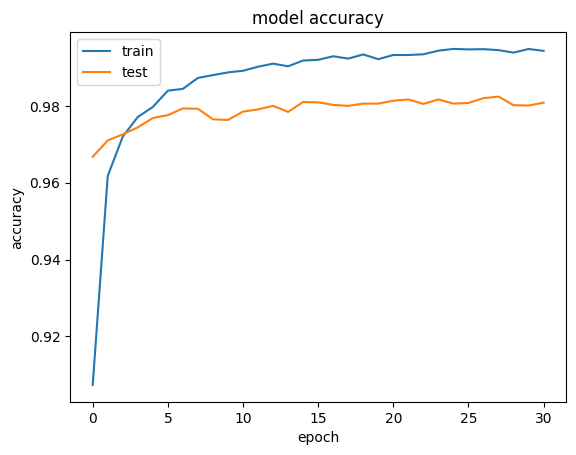

In [29]:
plt.plot(training4.history['accuracy'])
plt.plot(training4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

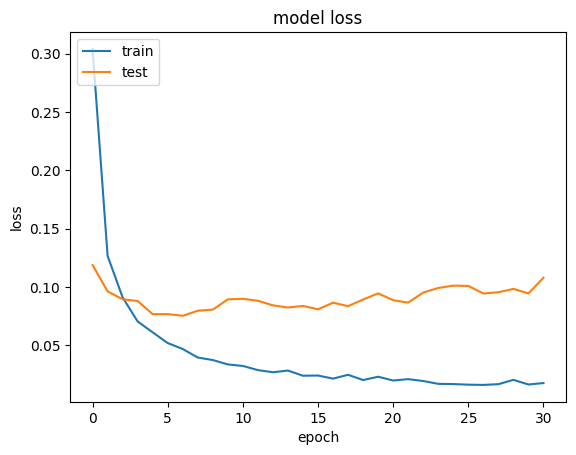

In [30]:
plt.plot(training4.history['loss'])
plt.plot(training4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
test_loss, test_acc = model_4.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9827
Test accuracy: 0.982699990272522


In [33]:
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert testing observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# Compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes) 

313/313 [==============================] - 0s 690us/step


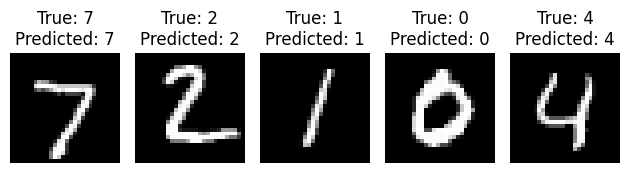

In [38]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    
    # Display the image
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {np.argmax(y_test[i])}\nPredicted: {np.argmax(y_pred[i])}')
    plt.axis('off')

plt.tight_layout()
plt.show()

<Axes: >

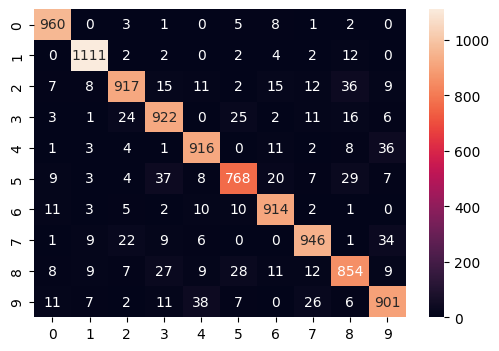

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mtx, annot=True, fmt='g')